<a href="https://colab.research.google.com/github/FelipeAugus/dio-baires-dev--machine-learning-training-ipynb/blob/main/05-frameworks-dl/reconhecimento-facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q deepface opencv-python

import cv2
from deepface import DeepFace
from google.colab.patches import cv2_imshow

In [2]:
imagem = "community_test.jpg"

In [3]:
# Detecta o box com os rostos
try:
    faces = DeepFace.extract_faces(img_path=imagem, enforce_detection=False)
    print(f"Detected {len(faces)} faces.")
except Exception as e:
    print(f"An error occurred during face detection: {e}")

Detected 8 faces.


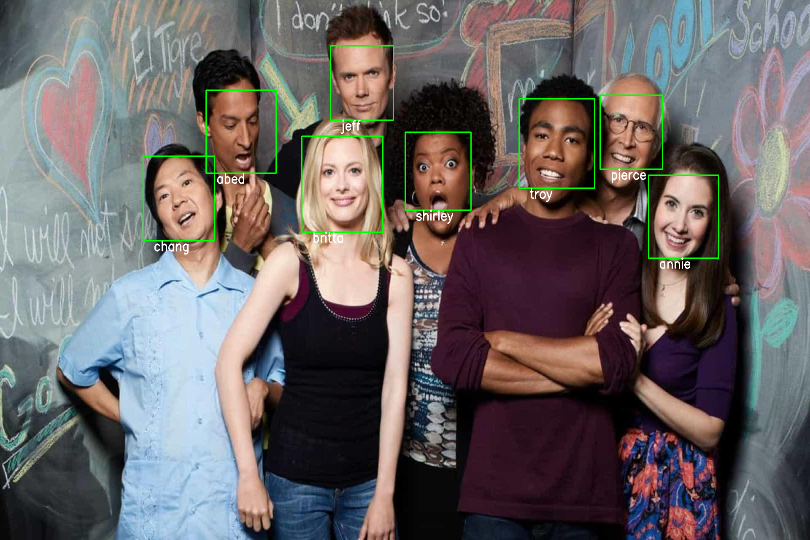

In [4]:
img = cv2.imread(imagem)
output_img = img.copy()

# Classifica cada um dos rostos que foi detectado na etapa anterior
confidence = 0.89
for i, face_info in enumerate(faces):
    if face_info['confidence'] < confidence: continue

    x, y, w, h = face_info['facial_area']['x'], face_info['facial_area']['y'], face_info['facial_area']['w'], face_info['facial_area']['h']

    # Desenha o box na magem
    color = (0, 255, 0)
    thickness = 2
    cv2.rectangle(output_img, (x, y), (x+w, y+h), color, thickness)

    try:
        cropped_face = img[y:y+h, x:x+w]
        # busca no banco de imagens com qual imagem aquele rosto bate
        results = DeepFace.find(img_path=cropped_face, db_path='community_face', enforce_detection=False, silent=True)
        if not results[0].empty: identity = results[0].iloc[0]['identity'].split('/')[-2].split('.')[0]
        else: identity = "Unknown"
    except Exception as e:
        identity = "Error"
        print(f"Error getting classification for visualization of face {i+1}: {e}")


    # adiciona a legenda no box
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.9
    font_thickness = 2
    label_color = (255, 255, 255)
    (text_width, text_height) = cv2.getTextSize(identity, font, font_scale, font_thickness)[0]
    label_position = (x+25, y+h+20)
    cv2.putText(output_img, identity, label_position, font, font_scale, label_color, font_thickness)

output_img = cv2.resize(output_img, (810, 540))
cv2_imshow(output_img)